In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
df =pd.read_csv('exam_dataset.csv')

In [3]:
pd.set_option('display.max_column',500)

In [4]:
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobLevel,JobRole,MaritalStatus,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,1,1,2,Female,2,Sales Executive,Single,3,0,0,1,6,0,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,1,2,3,Male,2,Research Scientist,Married,4,1,3,3,10,1,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,1,4,4,Male,1,Laboratory Technician,Single,3,0,3,3,0,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,1,5,4,Female,1,Research Scientist,Married,3,0,3,3,8,3,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,7,1,Male,1,Laboratory Technician,Married,3,1,3,3,2,2,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   MonthlyIncome            1470 non-null   int64 
 3   JobSatisfaction          1470 non-null   int64 
 4   Bonus                    1470 non-null   int64 
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   Education                1470 non-null   int64 
 8   EducationField           1470 non-null   object
 9   EmployeeCount            1470 non-null   int64 
 10  EmployeeNumber           1470 non-null   int64 
 11  EnvironmentSatisfaction  1470 non-null   int64 
 12  Gender                   1470 non-null   object
 13  JobLevel                 1470 non-null   int64 
 14  JobRole                  1470 non-null  

In [6]:
df[df["Gender"] == 'Male'].groupby([ 'MaritalStatus', 'BusinessTravel', 'JobSatisfaction']).size().unstack()

JobSatisfaction                   1   2   3   4
MaritalStatus BusinessTravel                   
Divorced      Non-Travel          6   8   8  11
              Travel_Frequently   6   4  15  14
              Travel_Rarely      27  28  34  49
Married       Non-Travel          6   9  11  10
              Travel_Frequently  13  13  18  30
              Travel_Rarely      57  55  95  84
Single        Non-Travel          6   5  12   9
              Travel_Frequently  11   5  13  18
              Travel_Rarely      38  35  55  64

In [7]:
grouped_df = df[['JobRole', 'Gender']].groupby(['JobRole', 'Gender']).size().unstack()
grouped_df
#for key, value in grouped_df:
#    print(grouped_df.get_group(key), '\n\n')

Gender,Female,Male
JobRole,,
Healthcare Representative,51,80
Human Resources,16,36
Laboratory Technician,85,174
Manager,47,55
Manufacturing Director,72,73
Research Director,33,47
Research Scientist,114,178
Sales Executive,132,194
Sales Representative,38,45


In [8]:
roles = sorted(list(df['JobRole'].unique()))
roles

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [9]:
[int(i) for i in list(range(15, 36, 5))]

[15, 20, 25, 30, 35]

In [10]:
first_color = '#EE0A1D' #color for representing the male
second_color = '#2901E7' #color for representing the female
goal_color = '#FAF9FF' #color for text inside the circle
line_color = '#000000'
y_ticks = [int(i) for i in list(range(15, 36, 5))]
fig, ax = plt.subplots(figsize=(18, 14))

In [11]:
spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(roles, fontweight='bold', fontsize=15, rotation=90)

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
ax.set_ylabel('Age', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

<ipython-input-11-ccbbcd45eddd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(roles, fontweight='bold', fontsize=15, rotation=90)


Text(187.72222222222223, 0.5, 'Age')

In [12]:
for role in roles:

    youngest = df[df['JobRole'] == role].groupby('Gender').agg({'Age' : 'min'}).astype(int).reset_index().sort_values(by='Gender', axis=0, ascending=False)

    male = ax.scatter(role, youngest.iloc[0]['Age'], c=first_color, s=600, zorder=3, ec=line_color)
    female = ax.scatter(role, youngest.iloc[1]['Age'], c=second_color, s=600, zorder=2, ec=line_color)
 
    ax.plot((role, role), (youngest.iloc[0]['Age'], youngest.iloc[1]['Age']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(role, youngest.iloc[0]['Age'], youngest.iloc[0]['Age'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    #ax.text(role, youngest.iloc[0]['Age']+0.8, youngest.iloc[0]['Gender'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(role, youngest.iloc[1]['Age'], youngest.iloc[1]['Age'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    #ax.text(role, youngest.iloc[1]['Age']-1, youngest.iloc[1]['Gender'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    
    for i, x in enumerate(roles):
        if x == role:
            ax.text(i + 0.15, youngest.iloc[0]['Age'], youngest.iloc[0]['Gender'], c=first_color, va='center', ha='left', fontsize=10, fontfamily='serif')
            ax.text(i - 0.15, youngest.iloc[1]['Age'], youngest.iloc[1]['Gender'], c=second_color, va='center', ha='right', fontsize=10, fontfamily='serif')


In [13]:
ax.legend([male, female],['Male', 'Female'])

In [14]:
youngest

,Gender,Age
1,Male,18
0,Female,18


In [15]:
ax.set_ylim(15, 35)

ax.grid(which='both', alpha=0.2)
ax.text(-1, 37, "Each Role's Youngest Fella", c='#000000',ha='left', va='center', fontsize=30, fontfamily='serif', fontweight='bold')
ax.text(-1, 36, "Company Pala Bana", c='#000000', ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')

plt.savefig('dumbbell-chart.png', dpi=700, bbox_inches='tight')

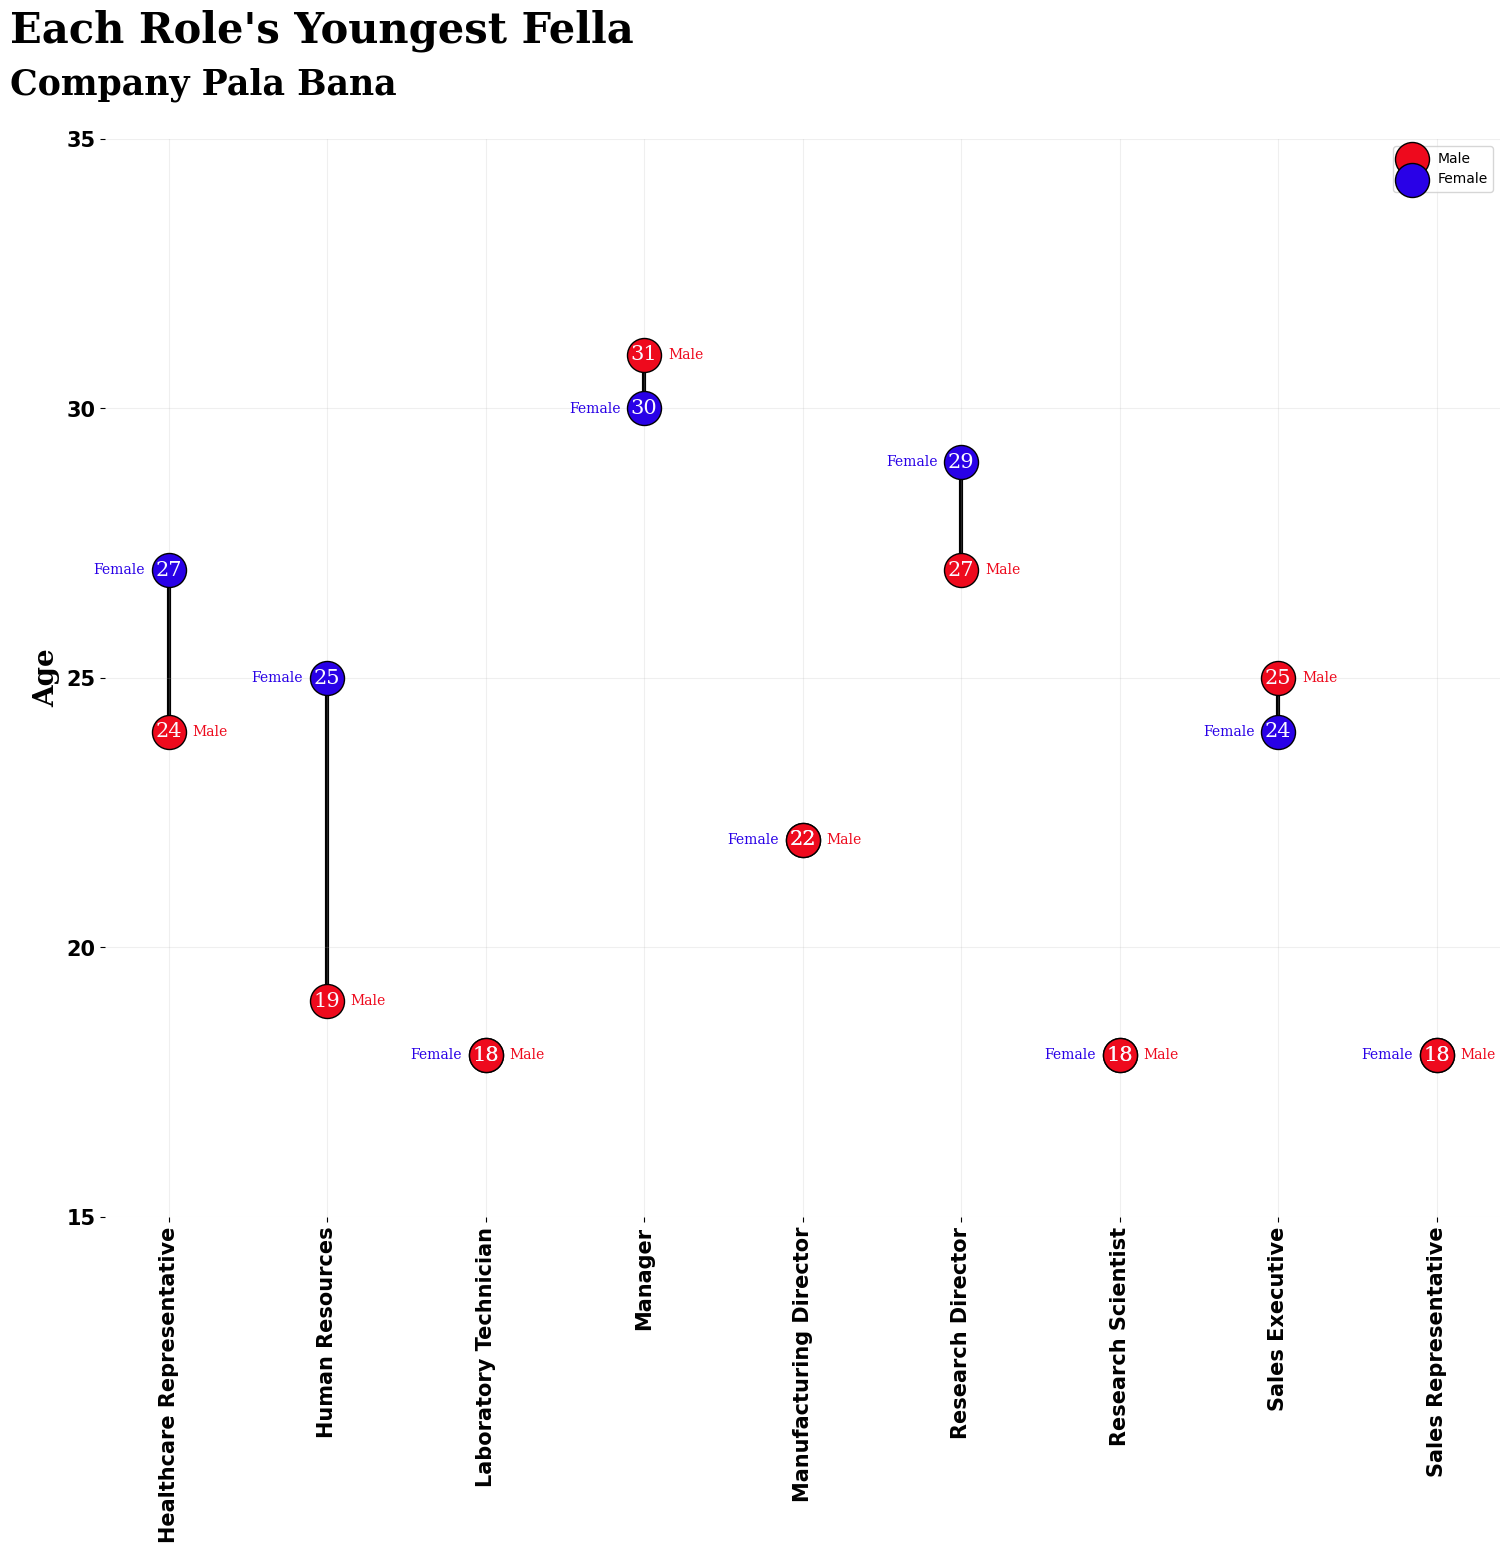

In [16]:
plt.show()